In [1]:
import pandas as pd
import numpy as np

In [13]:
from sklearn.model_selection import train_test_split

prng = np.random.RandomState(20240322)

real_estate_data = pd.read_csv("https://raw.githubusercontent.com/divenyijanos/ceu-ml/2023/data/real_estate/real_estate.csv")

real_estate_data_raw_cols = real_estate_data.columns.to_list()

['id',
 'transaction_date',
 'house_age',
 'distance_to_the_nearest_MRT_station',
 'number_of_convenience_stores',
 'latitude',
 'longitude',
 'house_price_of_unit_area']

In [20]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   414 non-null    int64  
 1   transaction_date                     414 non-null    float64
 2   house_age                            414 non-null    float64
 3   distance_to_the_nearest_MRT_station  414 non-null    float64
 4   number_of_convenience_stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house_price_of_unit_area             414 non-null    float64
 8   distance_to_city_center              414 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 29.2 KB


In [30]:
import math

city_center_coords = (25.0170, 121.4628)
def get_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Difference in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    # Earth radius in meters
    R = 6_371_000.0
    
    # Total distance in meters
    distance = R * c
    
    return distance

# feature engineering
real_estate_data['distance_to_city_center'] = real_estate_data[['latitude', 'longitude']].apply(lambda x: get_distance(city_center_coords[0], city_center_coords[1], x['latitude'], x['longitude']), axis=1)

real_estate_data['transaction_year'] = np.floor(real_estate_data['transaction_date']).astype(int)
real_estate_data['transaction_month'] = np.ceil(12 * np.subtract(real_estate_data['transaction_date'], real_estate_data['transaction_year'])).astype(int)
real_estate_data['transaction_month'] = real_estate_data['transaction_month'].apply(lambda x: 1 if x == 0 else x)

# group columns
quad_cols = ['house_age', 'distance_to_city_center', 'distance_to_the_nearest_MRT_station']
categorical_cols = ['transaction_month']
numerical_cols = ['transaction_year', 'number_of_convenience_stores'] + quad_cols

,id,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area,distance_to_city_center,transaction_year,transaction_month
404,405,2013.333,16.4,289.32480,5,24.98203,121.54348,41.2,9012.697258,2013,4
405,406,2012.667,23.0,130.99450,6,24.95663,121.53765,37.2,10098.189651,2012,9
406,407,2013.167,1.9,372.13860,7,24.97293,121.54026,40.5,9217.095942,2013,3
407,408,2013.000,5.2,2408.99300,0,24.95505,121.55964,22.3,11946.378498,2013,1
408,409,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1,7789.376805,2013,6
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,9352.679676,2013,1
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,9381.006114,2012,9
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,8828.876220,2013,3
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,9634.539521,2013,1
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9,9381.006114,2013,6


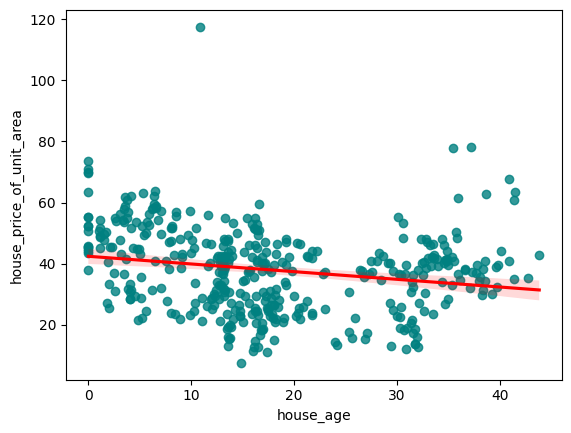

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=real_estate_data['house_age'], y=real_estate_data['house_price_of_unit_area'], scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
plt.show()

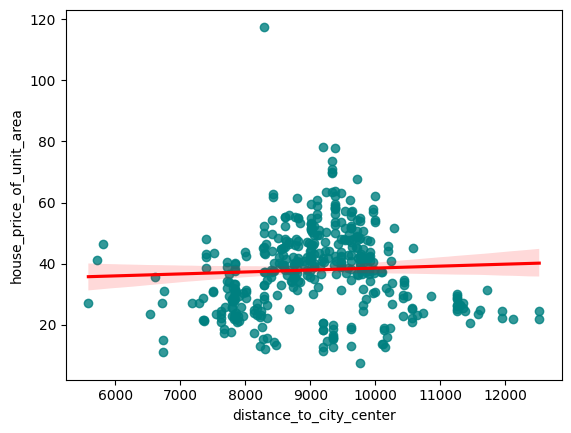

In [34]:
sns.regplot(x=real_estate_data['distance_to_city_center'], y=real_estate_data['house_price_of_unit_area'], scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
plt.show()

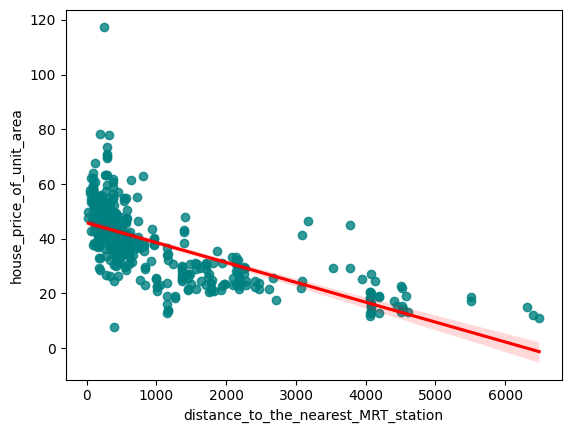

In [35]:
sns.regplot(x=real_estate_data['distance_to_the_nearest_MRT_station'], y=real_estate_data['house_price_of_unit_area'], scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
plt.show()

In [12]:
real_estate_sample = real_estate_data.sample(frac=0.2)
outcome = real_estate_sample["house_price_of_unit_area"]
features = real_estate_sample.drop(columns=["house_price_of_unit_area"])
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.3, random_state=prng)
print(f"Size of the training set: {y_train.shape[0]}, size of the test set: {y_test.shape[0]}")

Size of the training set: 58, size of the test set: 25


Think about an appropriate loss function you can use to evaluate your predictive models. What is the risk (from a business perspective) that you would have to take by making a wrong prediction?

Build a simple benchmark model and evaluate its performance on the hold-out set (using your chosen loss function).

Build a simple linear regression model using a chosen feature and evaluate its performance. Would you launch your evaluator web app using this model?

Build a multivariate linear model with all the meaningful variables available. Did it improve the predictive power?

Try to make your model (even) better. Document your process and its success while taking two approaches:
1. Feature engineering - e.g. including squares and interactions or making sense of lati- tude&longitude by calculating the distance from the city center, etc.
2. Training more flexible models - e.g. random forest or gradient boosting

Would you launch your web app now? What options you might have to further improve the prediction performance?

Rerun three of your previous models (including both flexible and less flexible ones) on the full train set. Ensure that your test result remains comparable by keeping that dataset intact. (Hint: extend the code snippet below.) Did it improve the predictive power of your models? Where do you observe the biggest improvement? Would you launch your web app now?

In [ ]:
real_estate_full = real_estate_data.loc[~real_estate_data.index.isin(X_test.index)]
print(f"Size of the full training set: {#TODO}")